In [1]:
#Prepare library
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import os

In [2]:
#Prepare data
#import requests

print('Beginning file download with requests')

URL=["http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv", #Confirmed/Suspected Cases
	"http://www.chp.gov.hk/files/misc/building_list_eng.csv", #Building List
	"http://www.chp.gov.hk/files/misc/large_clusters_eng.csv", #Top Cluster 10+
	"https://raw.githubusercontent.com/cydalytics/HK_Voters_Distribution/master/hkg_adm1.geojson" #https://abhijeet.carto.com/tables/hkg_adm1/public/map
]
URL[0]
URL[1]
URL[2]
URL[3]

for url in URL:
    r = requests.get(url)
    with open("data/"+url.split("/")[len(url.split("/"))-1], 'wb') as f:
        f.write(r.content)

    # Retrieve HTTP meta-data
    print(r.status_code)
    print(r.headers['content-type'])
    print(r.encoding)

for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Beginning file download with requests
200
text/csv
ISO-8859-1
200
text/csv
ISO-8859-1
200
text/csv
ISO-8859-1
200
text/plain; charset=utf-8
utf-8
data/building_list_eng.csv
data/enhanced_sur_covid_19_eng.csv
data/hkg_adm1.geojson
data/large_clusters_eng.csv


In [3]:
%matplotlib inline

import matplotlib.style
print(plt.style.available) # see what styles are available
mpl.style.use('Solarize_Light2')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
df = pd.read_csv('data/enhanced_sur_covid_19_eng.csv')
df.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [5]:
df.shape

(7804, 10)

In [6]:
df.columns

Index(['Case no.', 'Report date', 'Date of onset', 'Gender', 'Age',
       'Name of hospital admitted', 'Hospitalised/Discharged/Deceased',
       'HK/Non-HK resident', 'Case classification*', 'Confirmed/probable'],
      dtype='object')

In [7]:
df.rename(columns = {'Case no.': 'Case'}, inplace = True)
df.set_index('Case', inplace = True)

df

,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
Case,,,,,,,,,
1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed
...,...,...,...,...,...,...,...,...,...
7800,16/12/2020,Asymptomatic,F,58,NaN,To be provided,HK resident,Epidemiologically linked with local case,Confirmed
7801,16/12/2020,Asymptomatic,F,49,NaN,To be provided,HK resident,Local case,Confirmed
7802,16/12/2020,14/12/2020,F,65,NaN,To be provided,HK resident,Epidemiologically linked with local case,Confirmed


In [8]:
df.rename(columns = {'Case classification*': 'Class'}, inplace = True)
df

,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Class,Confirmed/probable
Case,,,,,,,,,
1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed
...,...,...,...,...,...,...,...,...,...
7800,16/12/2020,Asymptomatic,F,58,NaN,To be provided,HK resident,Epidemiologically linked with local case,Confirmed
7801,16/12/2020,Asymptomatic,F,49,NaN,To be provided,HK resident,Local case,Confirmed
7802,16/12/2020,14/12/2020,F,65,NaN,To be provided,HK resident,Epidemiologically linked with local case,Confirmed


In [9]:
df['Name of hospital admitted'].value_counts(dropna = False)


NaN    7804
Name: Name of hospital admitted, dtype: int64

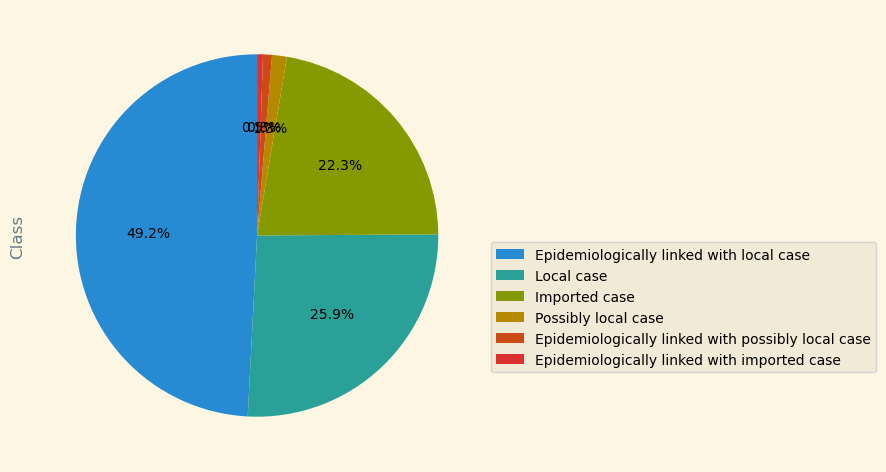

In [10]:
df['Class'].value_counts()

fig = plt.figure(figsize=(6,6), dpi=100)
df['Class'].value_counts().plot.pie(startangle = 90, autopct = '%1.1f%%', labels = None)
plt.legend(labels = df['Class'].value_counts().index, bbox_to_anchor =(1, 0.5))
plt.show()


In [11]:
df.head()
df.tail()


,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Class,Confirmed/probable
Case,,,,,,,,,
7800,16/12/2020,Asymptomatic,F,58,NaN,To be provided,HK resident,Epidemiologically linked with local case,Confirmed
7801,16/12/2020,Asymptomatic,F,49,NaN,To be provided,HK resident,Local case,Confirmed
7802,16/12/2020,14/12/2020,F,65,NaN,To be provided,HK resident,Epidemiologically linked with local case,Confirmed
7803,16/12/2020,11/12/2020,M,40,NaN,To be provided,HK resident,Local case,Confirmed
7804,16/12/2020,11/12/2020,F,78,NaN,To be provided,HK resident,Local case,Confirmed


In [12]:
df['Date of onset'].value_counts()


Asymptomatic    2171
27/07/2020       131
25/07/2020       118
24/07/2020       113
22/07/2020       106
                ... 
10/06/2020         1
27/04/2020         1
22/05/2020         1
15/02/2020         1
15/05/2020         1
Name: Date of onset, Length: 286, dtype: int64

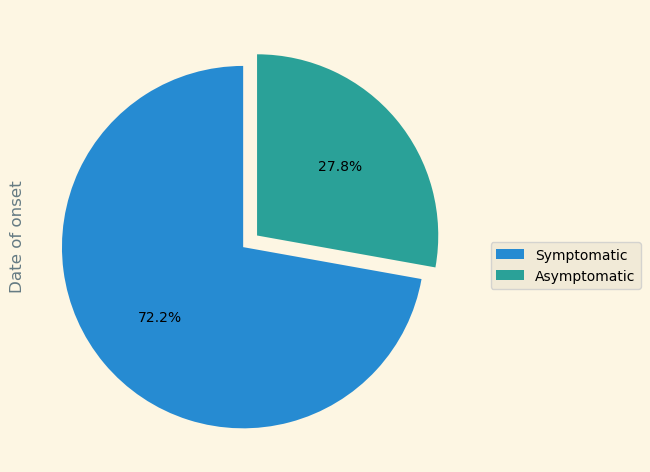

In [13]:
df_asym = df.copy()
df_asym = df_asym.replace(to_replace=r"^(.(?<!Asymptomatic))*?$", value = "Symptomatic", regex = True)
fig = plt.figure(figsize=(6,6), dpi=100)
df_asym['Date of onset'].value_counts().plot.pie(startangle = 90, autopct = '%1.1f%%', labels = None, explode = (0.1, 0))
plt.legend(labels = df_asym['Date of onset'].value_counts().index, bbox_to_anchor =(1, 0.5))
plt.show()

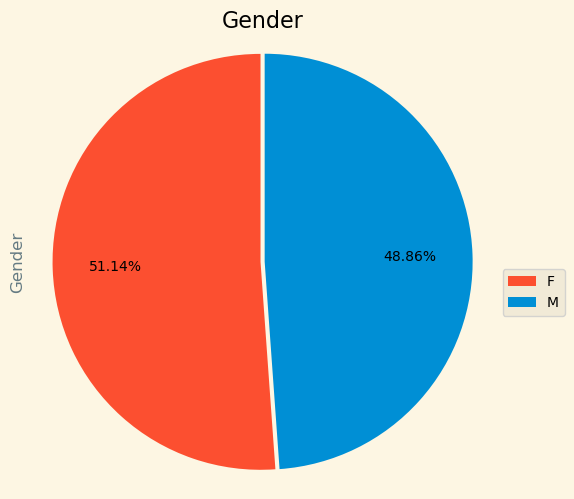

In [14]:
df_gender = df['Gender'].value_counts()
df_gender

# Gender Plot
fig = plt.figure(figsize=(6,6), dpi=100)
colors = ['#fc4f30','#008fd5']
plt.title('Gender')
df_gender.plot(kind = 'pie',labels = None ,colors = colors, startangle = 90, autopct='%1.2f%%',pctdistance=0.7, explode = (0.01, 0.01))
plt.legend(labels=df_gender.index, bbox_to_anchor =(1, 0.5)) 
plt.axis('equal')
plt.show()

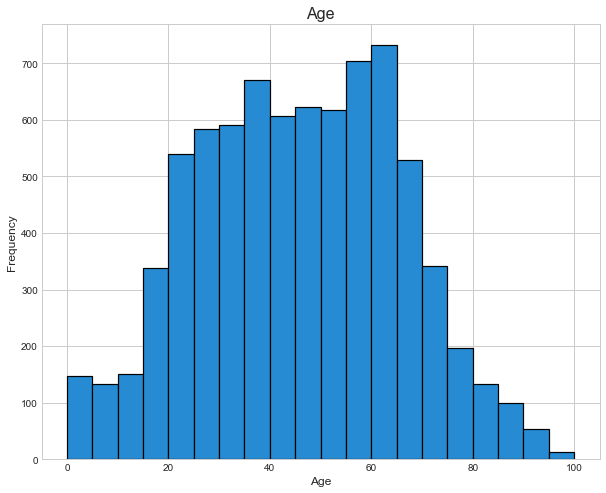

In [15]:
# Age Plot
count, bin_edges = np.histogram(df['Age'], 20)
plt.style.use('seaborn-whitegrid')
plt.title('Age')
df['Age'].plot(kind = 'hist', figsize = (10,8), bins =bin_edges, edgecolor = 'black', linewidth = 1.2)
plt.xlabel("Age")
plt.show()

In [16]:
df_residence = df['HK/Non-HK resident'].value_counts()
df_residence

df.replace({'HK resident' : 'HK Resident',
            'non-HK resident':'Non-HK Resident',
            'Non-HK resident':'Non-HK Resident',}, inplace = True)
df_residence = df['HK/Non-HK resident'].value_counts()
df_residence

HK Resident        7503
Non-HK Resident     300
Pending               1
Name: HK/Non-HK resident, dtype: int64

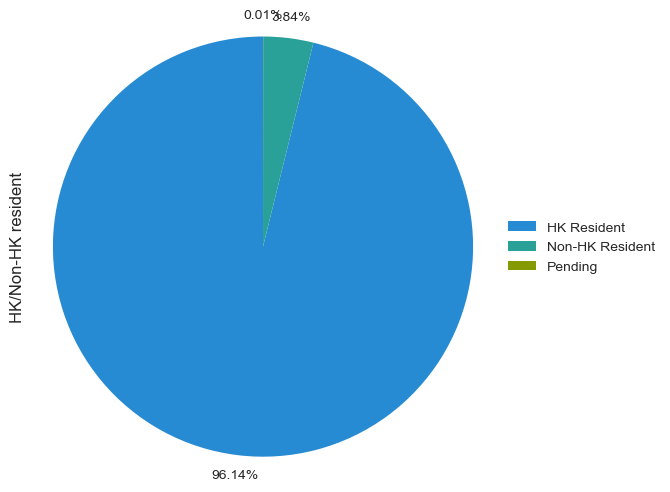

In [17]:
fig = plt.figure(figsize=(6,6), dpi=100)
df_residence.plot(kind = 'pie', autopct = '%1.2f%%', pctdistance = 1.1, startangle = 90, labels = None)
plt.legend(labels=df_residence.index, loc='center left', shadow = True, bbox_to_anchor =(1, 0.5))
plt.axis('equal')

plt.show()

In [28]:
df_status = df['Hospitalised/Discharged/Deceased'].value_counts()
df_status


Discharged           6439
Hospitalised         1127
Deceased              123
To be provided         82
No admission           30
Pending admission       3
Name: Hospitalised/Discharged/Deceased, dtype: int64

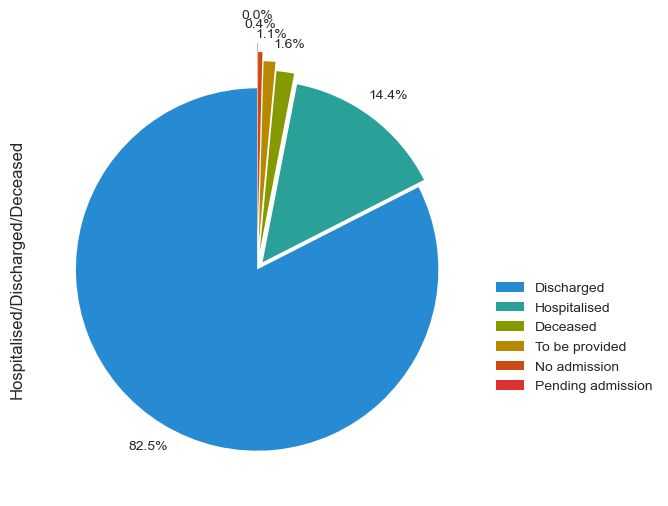

In [29]:
fig = plt.figure(figsize=(6,6), dpi=100)
df_status.plot(kind = 'pie', autopct = '%1.1f%%', pctdistance = 1.15, startangle = 90, labels = None, explode = (0,0.05,0.1,0.15,0.2,0.25))
plt.legend(labels = df_status.index, bbox_to_anchor =(1, 0.5))
plt.show()

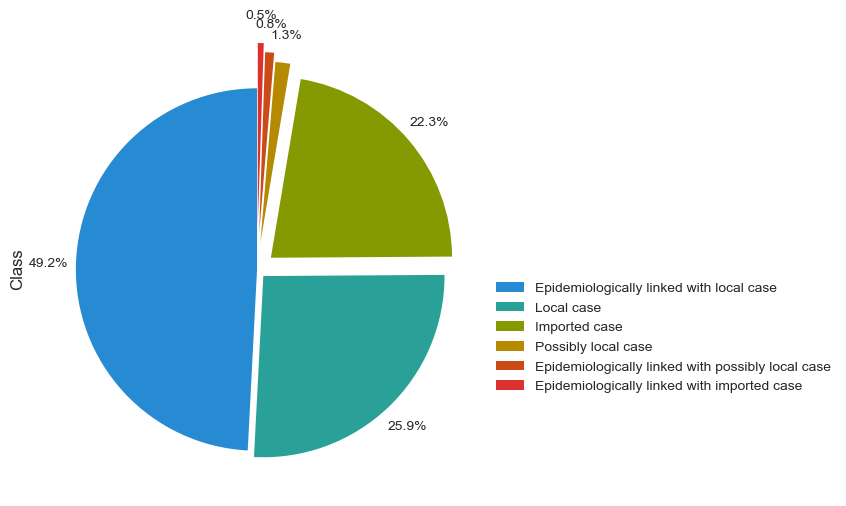

In [18]:
fig = plt.figure(figsize=(6,6), dpi=100)
df['Class'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', pctdistance = 1.15, startangle = 90, labels = None, explode = (0,0.05,0.1,0.15,0.2,0.25))
plt.legend(labels = df['Class'].value_counts().index, bbox_to_anchor =(1, 0.5))
plt.show()

In [19]:
date = df['Report date']
df_date = pd.DataFrame(date.value_counts())
df_date.reset_index(inplace = True)
df_date.columns = ['Report date', 'Cases']
df_date['Report date'] = pd.to_datetime(df_date['Report date'], format = '%d/%m/%Y')
df_date.sort_values(['Report date'], inplace = True)
df_date.set_index('Report date', inplace = True)
df_date['Cumulative Cases'] = df_date['Cases'].cumsum()

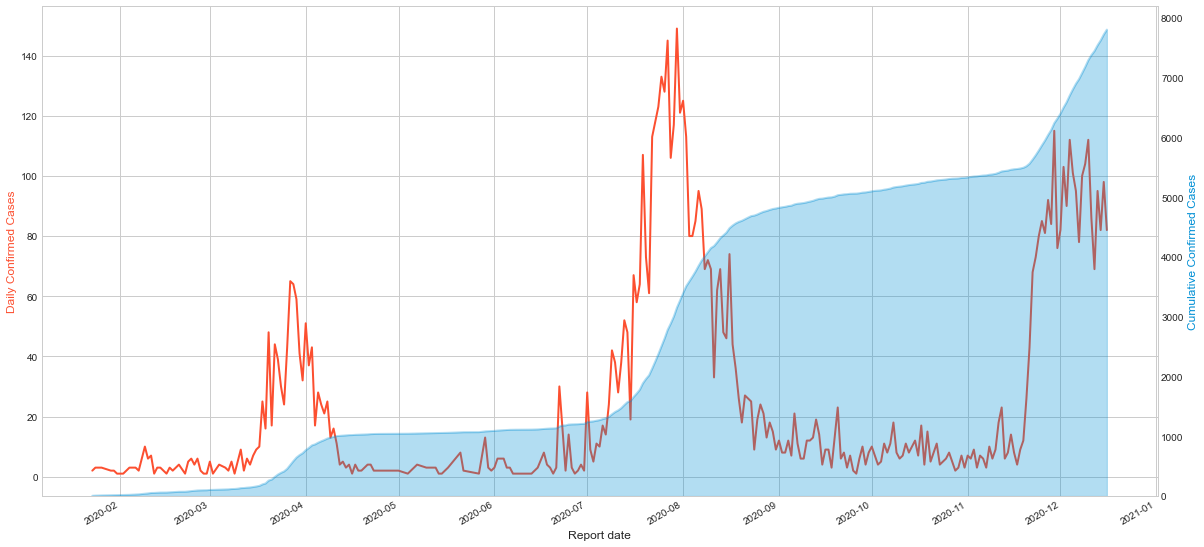

In [20]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_ylabel('Daily Confirmed Cases', color = '#fc4f30')
ax1.set_xlabel('Date')
ax1 = df_date['Cases'].plot(color = '#fc4f30')

ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Confirmed Cases', color = '#008fd5')
ax2 = df_date['Cumulative Cases'].plot(kind = 'area', alpha = 0.3, color = '#008fd5')

ax2.grid(False)

In [21]:
#import another dataset
df_building = pd.read_csv('data/building_list_eng.csv')
df_building.head()


,District,Building name,Last date of residence of the case(s),Related probable/confirmed cases
0,Wan Chai,Gordon House,NaN,6398
1,Kwun Tong,"Block 23, Laguna City",NaN,6398
2,Yau Tsim Mong,"Tower 2, Harbour Green",NaN,6399
3,Kowloon City,"Tower 26, Parc Oasis",NaN,6401
4,Kwai Tsing,"Block 3, Highland Park",NaN,6402


In [22]:
df_building.shape


(1787, 4)

In [23]:
df_building.describe()


,District,Building name,Last date of residence of the case(s),Related probable/confirmed cases
count,1787,1787,536,1787
unique,18,1359,28,1374
top,Kwun Tong,Tung Wah Group Of Hospitals Fong Shu Chuen Day...,03/12/2020,7360
freq,211,39,63,9


In [24]:
df_district = pd.DataFrame(df_building['District'].value_counts())
df_district.reset_index(inplace = True)
df_district.columns = ['District', 'Cases Count']
df_district.replace({'Central & Western' : 'Central and Western'}, inplace = True)
df_district

,District,Cases Count
0,Kwun Tong,211
1,Sha Tin,182
2,Yau Tsim Mong,172
3,Wong Tai Sin,134
4,Eastern,134
5,Kwai Tsing,128
6,Sham Shui Po,122
7,Kowloon City,120
8,Central and Western,99
9,Yuen Long,84


In [25]:
import folium
import geojson
hk_map = folium.Map(location = [22.34, 114.1], zoom_start = 11, tiles = 'cartodbpositron')
hk_map

In [26]:
hk_geo = geojson.load(open('data/hkg_adm1.geojson'))


In [27]:
choropleth = folium.Choropleth(geo_data = hk_geo,
                  name = 'choropleth',
                  data = df_district, 
                  columns = ['District', 'Cases Count'],
                 key_on = 'feature.properties.name_1',
                 fill_color = 'PuRd',
                 legend_name = 'Cases Count',
                 highlight = True).add_to(hk_map)

toollip = folium.features.GeoJsonTooltip(fields = ['name_1'], aliases = ['District: '])
choropleth.geojson.add_child(toollip)

hk_map

In [31]:
#import another dataset
df_cluster = pd.read_csv('data/large_clusters_eng.csv')
df_cluster = df_cluster.set_index('Cluster')
df_cluster.head()

,Involved case number,Number of cases
Cluster,,
Diamond Princess Cruise Ship,"14, 71, 78, 79, 80, 81, 87, 88, 94, 96, 97",11
Hotpot dinner gathering at Kwun Tong,"27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 41, 44...",13
Fook Wai Ching She in Maylun Apartments in North Point,"64, 65, 70, 73, 74, 76, 77, 83, 84, 86, 89, 91...",19
Travel tour to Egypt / Heng Tai House of Fu Heng Estate,"119, 120, 121, 123, 124, 125, 126, 127, 129, 140",10
Bar and band cluster,"182, 227, 276, 343, 360, 362, 367, 384, 386, 3...",103


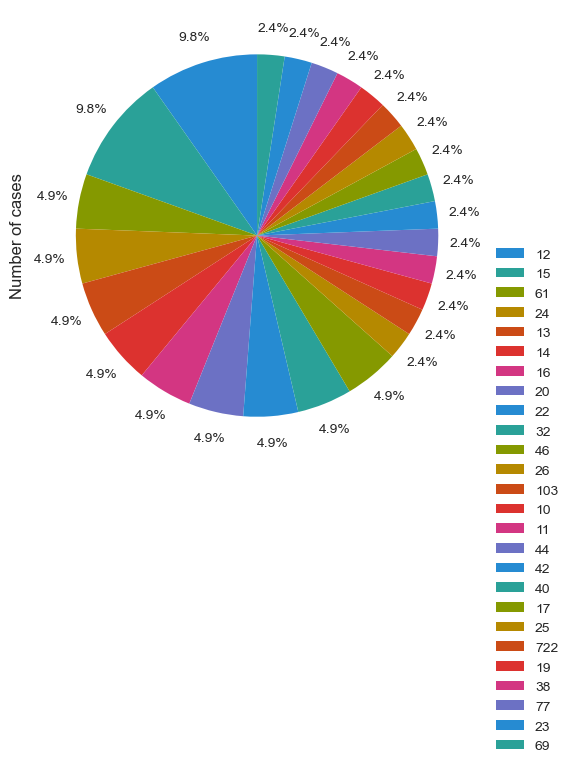